In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from mlptools.analyzer.ml_metrics import get_all_score_df

# path2target = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/43/three/rc_4-np_6'
path2target = '/sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang'
# path2target = '/home/y1u0d2/result/n2p2/Si/100/06'

if os.path.exists(f'{path2target}/score.csv'):
    score_df = pd.read_csv(f'{path2target}/score.csv')
else:
    score_df = get_all_score_df(path2target)

score_df.to_csv(f'{path2target}/score.csv', index=False)

In [3]:
def plot_score(df, score, ax):
    # plot log scale
    ax.set_yscale('log')
    sns.lineplot(data=df, x='epoch', y=score, hue='data_type', ax=ax)

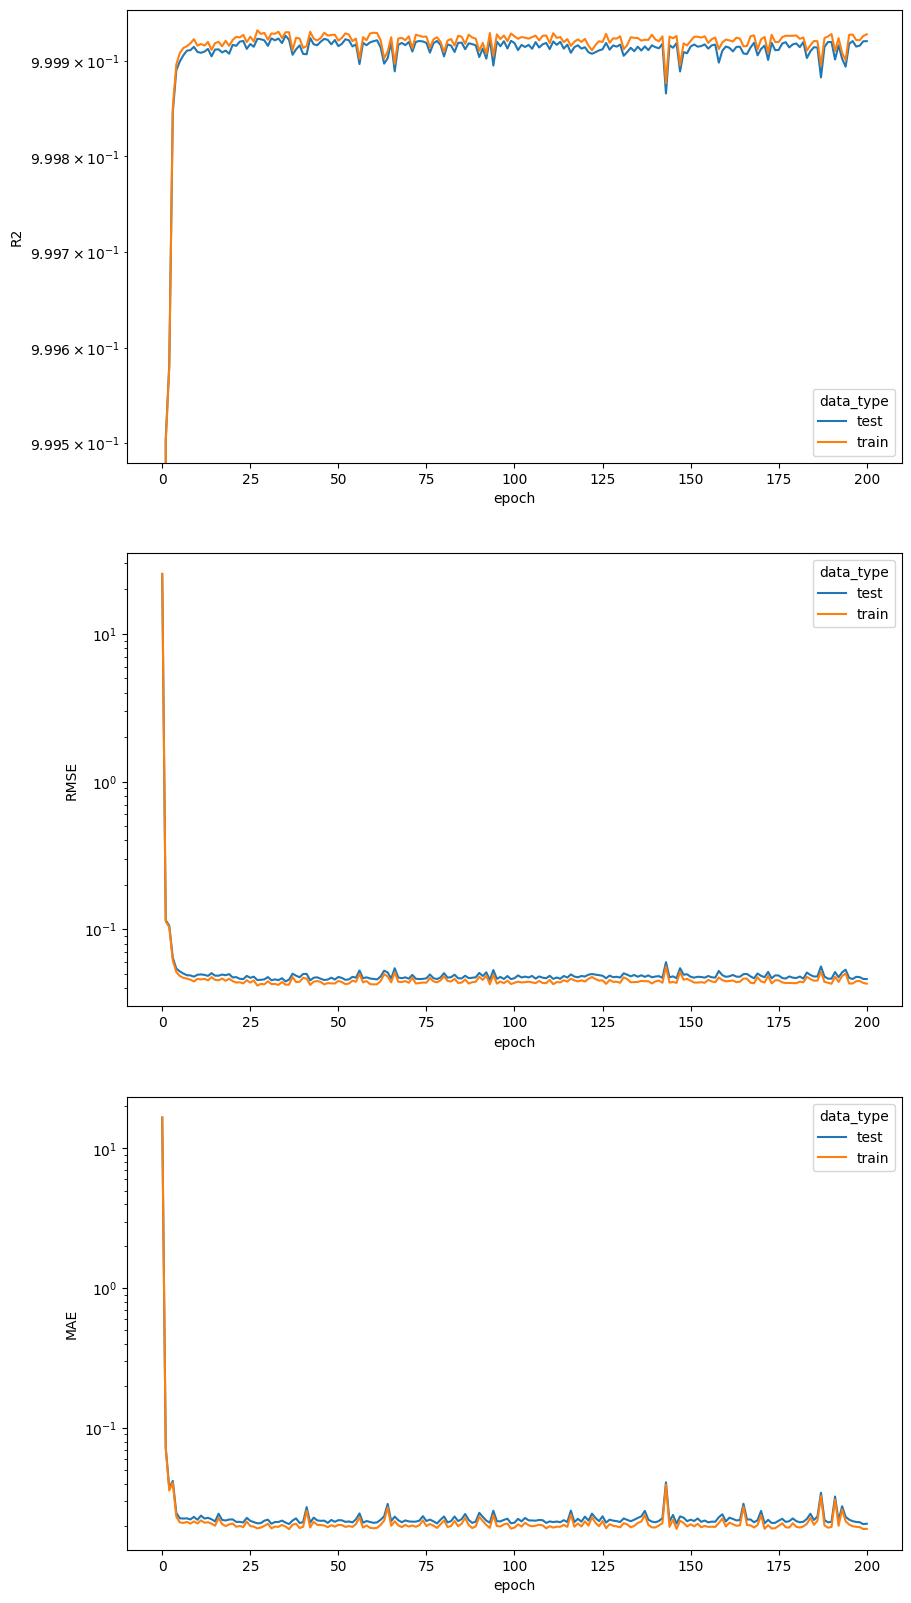

In [4]:
energy_df = score_df.loc[score_df['type'] == 'energy']

fig = plt.figure(figsize=(10,20))
axes = fig.subplots(3, 1)

plot_score(energy_df, 'R2', axes[0])
plot_score(energy_df, 'RMSE', axes[1])
plot_score(energy_df, 'MAE', axes[2])

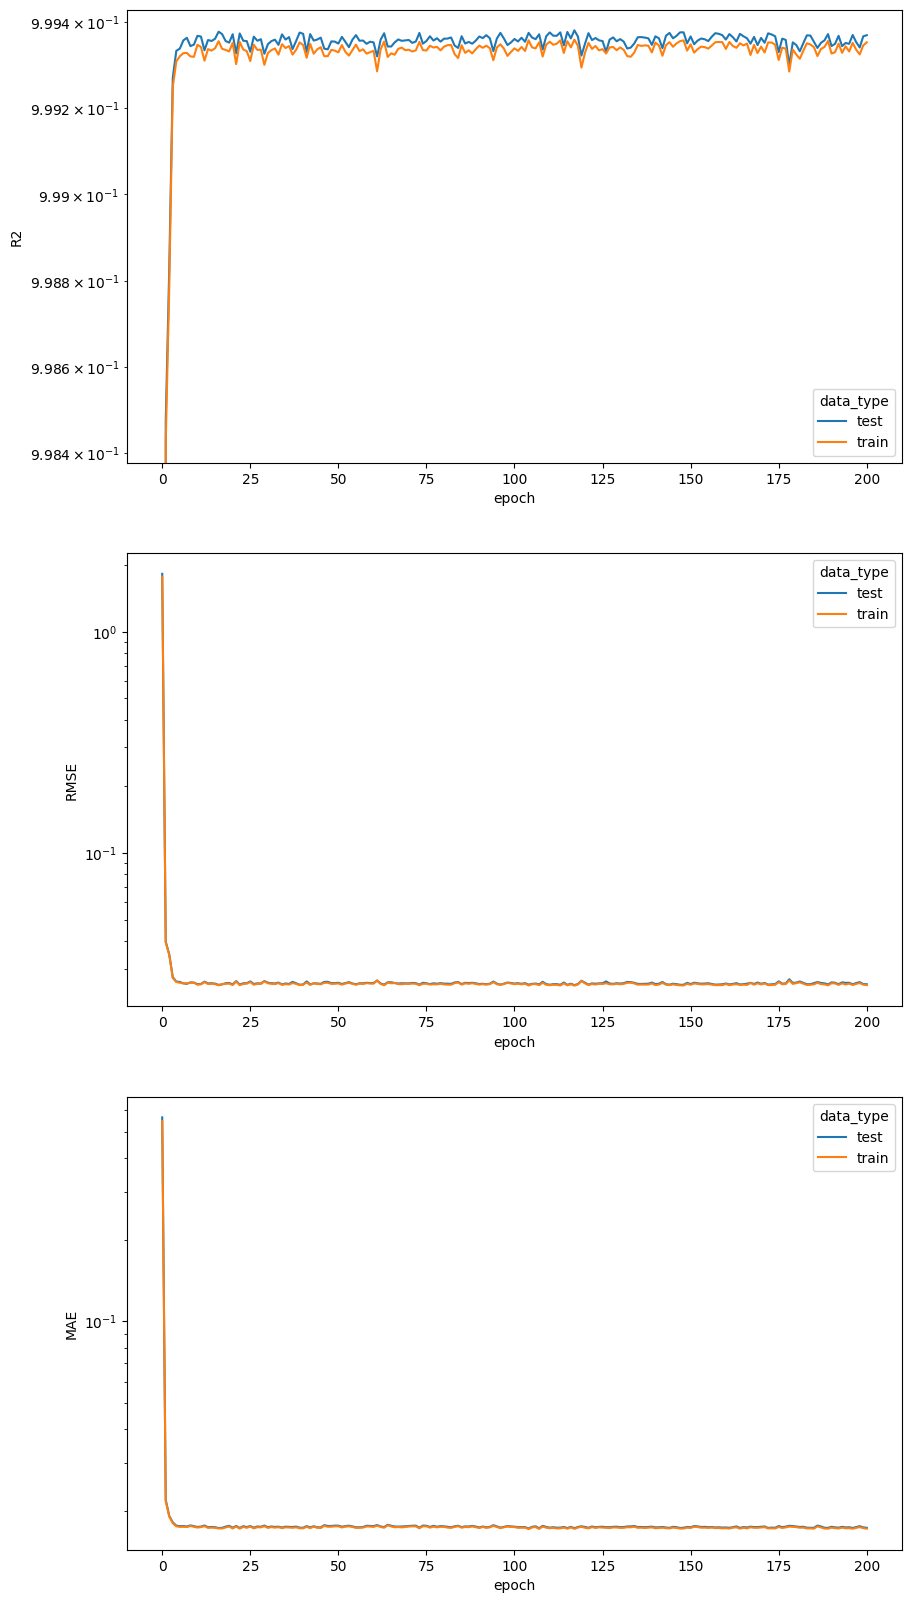

In [5]:
force_df = score_df.loc[score_df['type'] == 'force']

fig = plt.figure(figsize=(10,20))
axes = fig.subplots(3, 1)

# axes[0].set_ylim(-1, 1.1)
plot_score(force_df, 'R2', axes[0])
plot_score(force_df, 'RMSE', axes[1])
plot_score(force_df, 'MAE', axes[2])

In [6]:
score_df.query('epoch == 57')

,R2,RMSE,MAE,epoch,data_type,type
228,0.999358,0.025794,0.017452,57,test,force
229,0.999337,0.025631,0.017374,57,train,force
230,0.999919,0.046693,0.021026,57,test,energy
231,0.999925,0.043815,0.019410,57,train,energy
